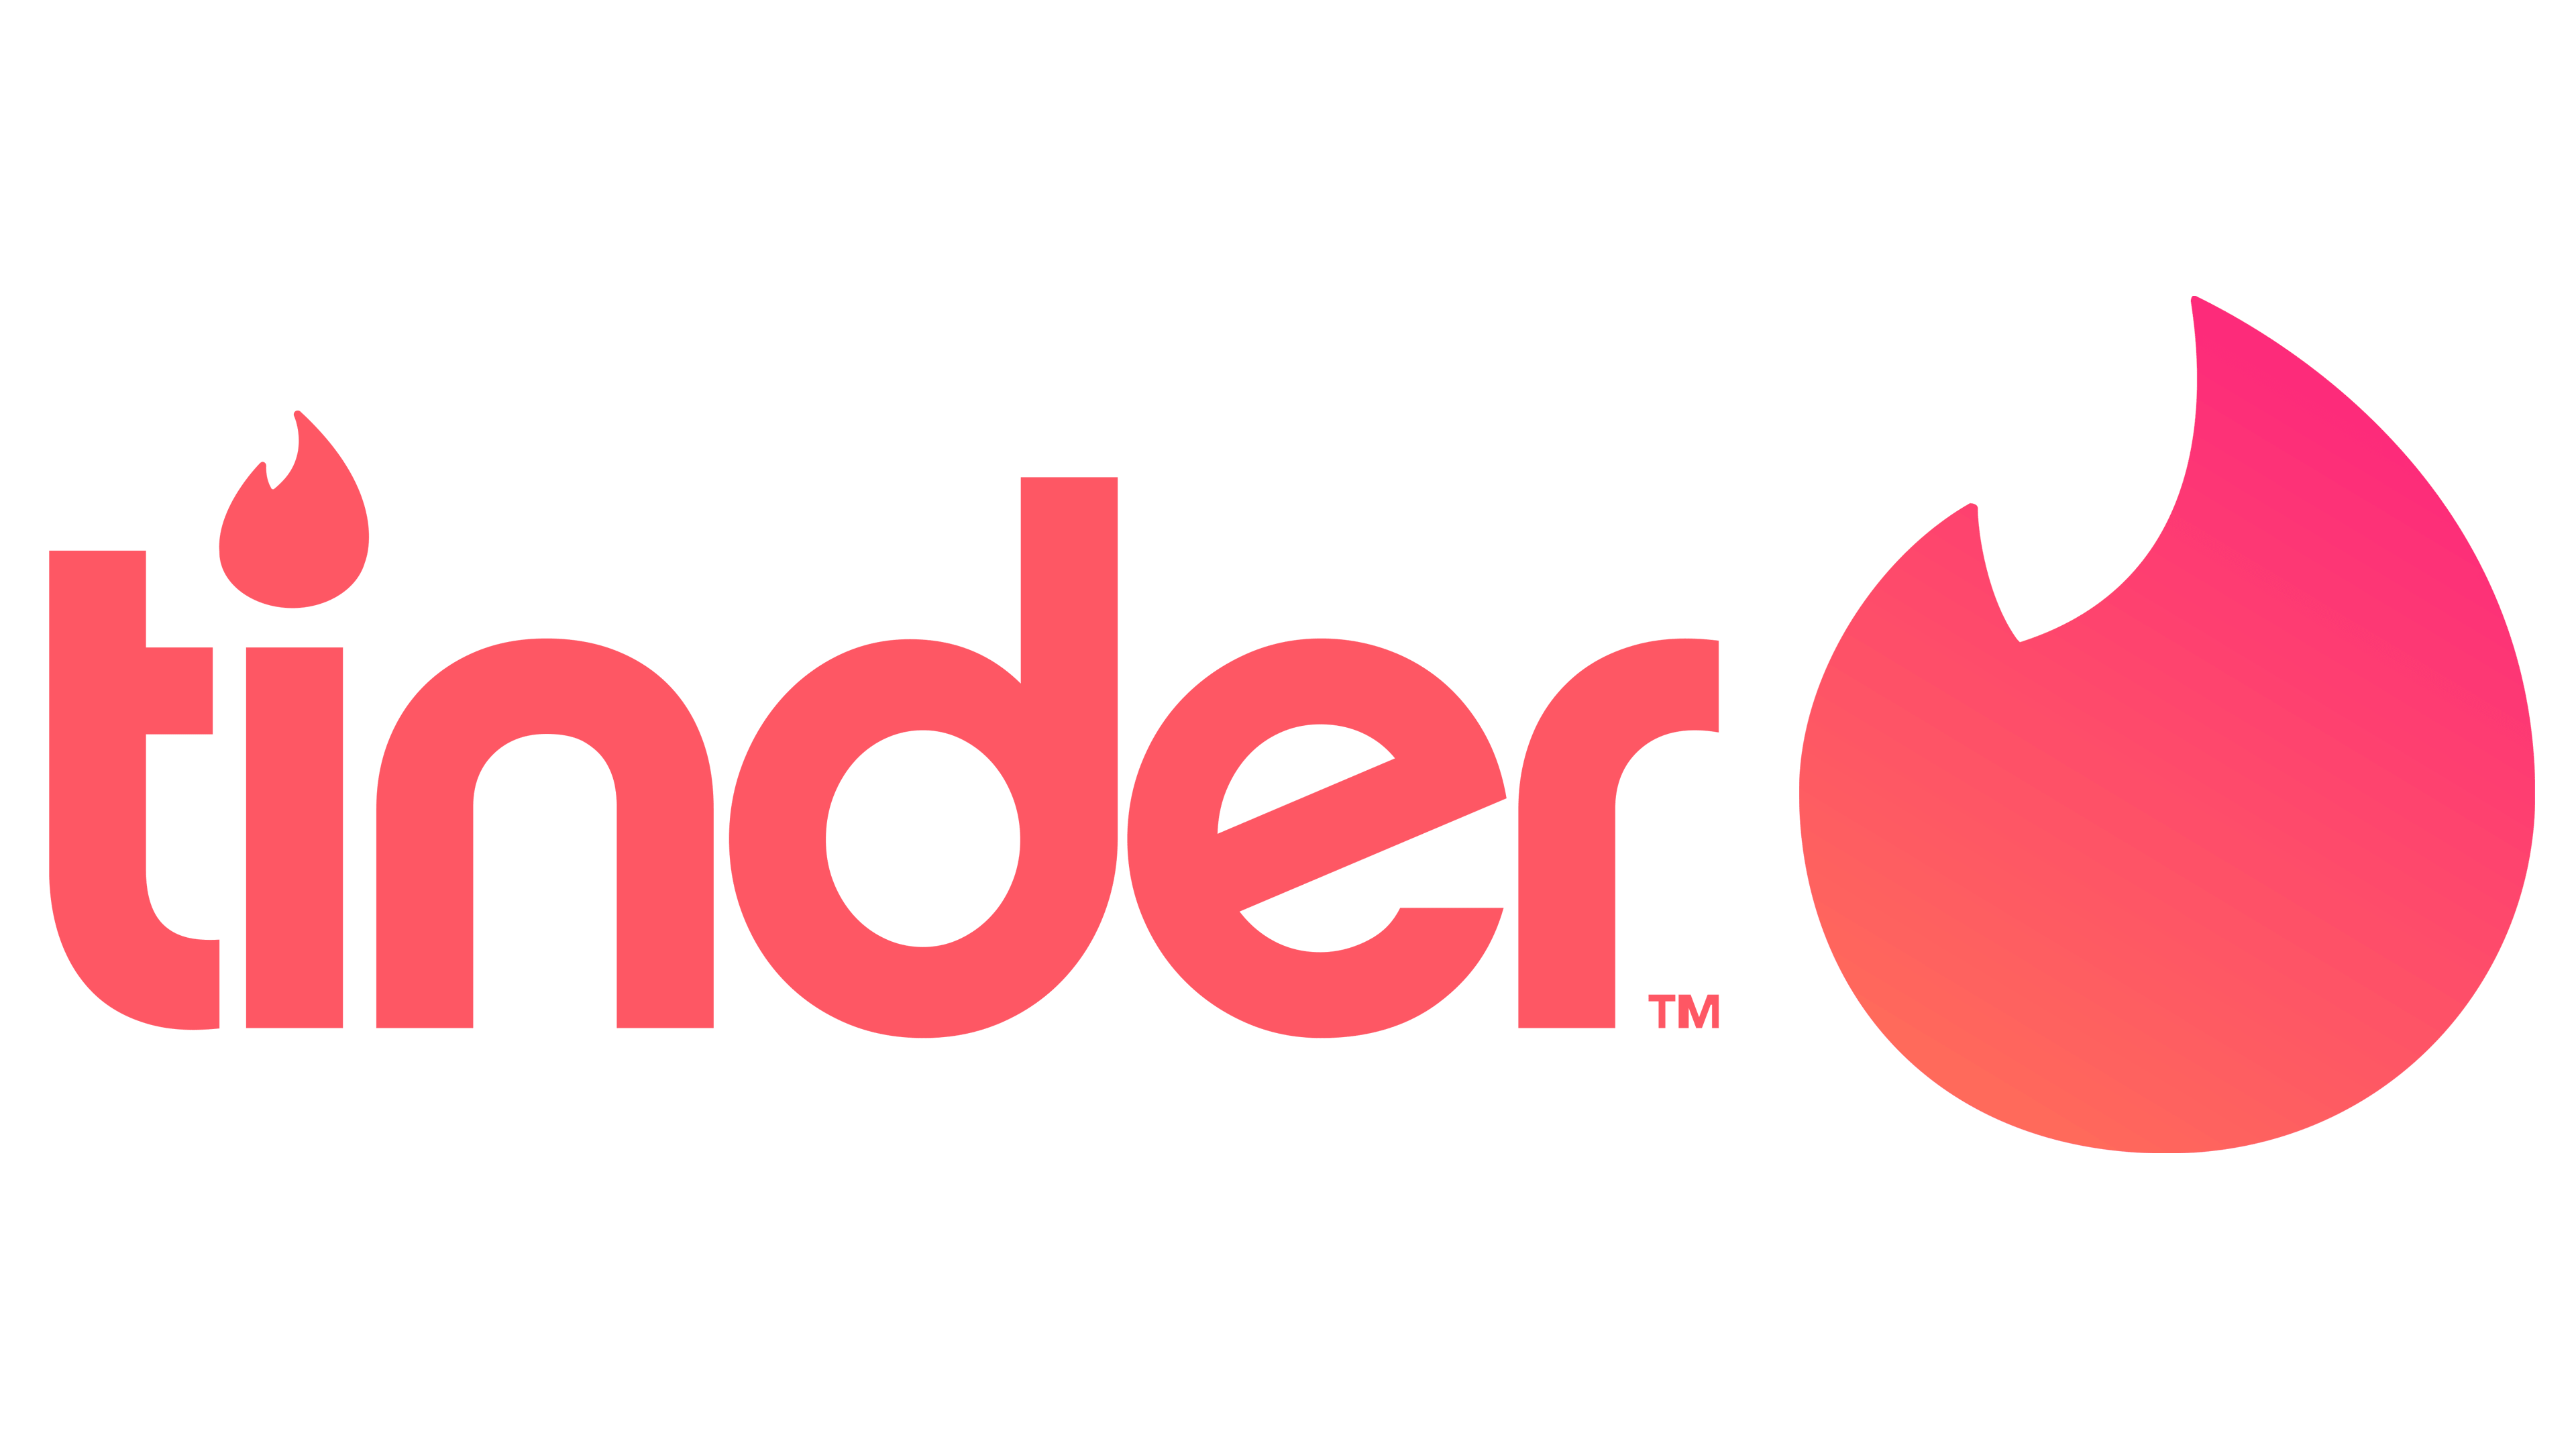
Tinder
Company's description 📇
Tinder is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests.

Tinder was launched by Sean Rad at a hackathon held at the Hatch Labs incubator in West Hollywood in 2012.

As of 2021, Tinder has recorded more than 65 billion matches worldwide.

Project 🚧
The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand what makes people interested into each other.

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

Goals 🎯
Use the dataset to understand what makes people interested into each other to go on a second date together:

You may use descriptive statistics
You may use visualisations
Scope of this project 🖼️
Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

Dataset

Dataset Description

Helpers 🦮
To help you achieve this project, here are a few tips that should help you

Data Exploration Ideas :

What are the least desirable attributes in a male partner? Does this differ for female partners?
How important do people think attractiveness is in potential mate selection vs. its real impact?
Are shared interests more important than a shared racial background?
Can people accurately predict their own perceived value in the dating market?
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?
Deliverable 📬
To complete this project, your team should deliver:

A notebook with:

descriptive statistics
visualisations
captions and interpretations on how the stats and visualisations are relevant to why people agree to a second date

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.max_columns = None

### 1. EXPLORATION INITIALE DU DATASET

In [2]:
# Chargement dataset
Tinder = pd.read_csv('../data/Speed+Dating+Data.csv', encoding='latin-1')

# Vue d'ensemble
Tinder.shape


(8378, 195)

In [3]:
# Aperçu des premières lignes
Tinder.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Notre dataset contient 8378 observations et 195 variables. Chaque ligne représente un rendez-vous rapide entre deux personnes et indique si chacune d'entre elles a secrètement accepté de participer à un deuxième rendez-vous avec l'autre personne.


### 2. ANALYSE DE LA VARIABLE TARGET

In [4]:
# Analyse variable target
print("Variable 'match' (notre target):")
print(Tinder['match'].value_counts())
print(f"Taux de match: {Tinder['match'].mean():.2%}")

Variable 'match' (notre target):
match
0    6998
1    1380
Name: count, dtype: int64
Taux de match: 16.47%


Notre variable cible 'match' nous indique si un couple s'est formé lors du speed dating. Avec un taux de match de 16.5%, nous voyons que la majorité des rencontres ne mènent pas à un second rendez-vous. Cela révèle un potentiel d'amélioration important pour optimiser les algorithmes de matching.


In [5]:
# Visualisation du taux de match
fig = px.pie(values=Tinder['match'].value_counts().values, 
             names=['Pas de match', 'Match'],
             title='Répartition des Matches dans les Speed Dates')
fig.show()

### 3. CRÉATION DE VARIABLES LISIBLES

In [6]:
# Création variable genre lisible
Tinder['gender_name'] = Tinder['gender'].replace({0: 'Female', 1: 'Male'})
print("Distribution par genre :")
print(Tinder['gender_name'].value_counts())

Distribution par genre :
gender_name
Male      4194
Female    4184
Name: count, dtype: int64


La variable 'gender' originale utilise des codes 0 et 1 qui ne sont pas explicites. Nous créons 'gender_name' avec des labels clairs 'Female' et 'Male' pour faciliter l'interprétation des analyses et la lisibilité des graphiques. Cette transformation est essentielle pour une communication claire des résultats.

### 4. ANALYSE DES 6 ATTRIBUTS FONDAMENTAUX

In [7]:
# Les 6 attributs évalués lors des speed dates
attributs = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
print("Statistiques des 6 attributs :")
print(Tinder[attributs].describe())

Statistiques des 6 attributs :
              attr         sinc        intel          fun          amb  \
count  8176.000000  8101.000000  8082.000000  8028.000000  7666.000000   
mean      6.189995     7.175164     7.368597     6.400598     6.777524   
std       1.950169     1.740315     1.550453     1.953702     1.794055   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     6.000000     5.000000     6.000000   
50%       6.000000     7.000000     7.000000     7.000000     7.000000   
75%       8.000000     8.000000     8.000000     8.000000     8.000000   
max      10.000000    10.000000    10.000000    10.000000    10.000000   

              shar  
count  7311.000000  
mean      5.474559  
std       2.156363  
min       0.000000  
25%       4.000000  
50%       6.000000  
75%       7.000000  
max      10.000000  


Les participants évaluent leur partenaire sur six dimensions : attractivité (attr), sincérité (sinc), intelligence (intel), côté amusant (fun), ambition (amb), et intérêts partagés (shar). Ces attributs sont notés sur une échelle, généralement de 1 à 10, et constituent le cœur de notre analyse des facteurs d'attraction.


### 5. ANALYSE COMPLÈTE DES VALEURS MANQUANTES

In [8]:
print("Analyse complète des valeurs manquantes :")

# Calcul du pourcentage de valeurs manquantes
missing_percent = (Tinder.isnull().sum() / len(Tinder) * 100).round(1)

print("Pourcentage de valeurs manquantes par variable :")
print(missing_percent.sort_values(ascending=False).head(10))

Analyse complète des valeurs manquantes :
Pourcentage de valeurs manquantes par variable :
num_in_3    92.0
numdat_3    82.1
expnum      78.5
amb7_2      76.7
sinc7_2     76.7
shar7_2     76.4
intel7_2    76.3
fun7_2      76.3
attr7_2     76.3
intel7_3    75.9
dtype: float64


Cette analyse révèle que certaines variables ont jusqu'à 92% de valeurs manquantes, ce qui les rend inutilisables pour notre analyse. Une stratégie de sélection rigoureuse est nécessaire pour garantir la qualité de nos conclusions.

In [9]:
print(f"\n=== STRATÉGIE DE SÉLECTION ===")
# Variables exploitables (<20% manquant)
variables_bonnes = missing_percent[missing_percent < 20].index.tolist()
print(f"Variables exploitables (<20% manquant) : {len(variables_bonnes)}")

# Variables à écarter (>40% manquant) 
variables_mauvaises = missing_percent[missing_percent > 40].index.tolist()
print(f"Variables à écarter (>40% manquant) : {len(variables_mauvaises)}")

print(f"\nDataset de travail final : {len(variables_bonnes)} variables de qualité")


=== STRATÉGIE DE SÉLECTION ===
Variables exploitables (<20% manquant) : 106
Variables à écarter (>40% manquant) : 71

Dataset de travail final : 106 variables de qualité


Nous adoptons une approche pragmatique : conserver les 106 variables avec moins de 20% de données manquantes et écarter les 71 variables trop incomplètes. Cette stratégie nous assure un dataset robuste pour l'analyse.


In [10]:
# Vérification valeurs manquantes sur variables clés
print("Valeurs manquantes sur les variables clés :")
variables_cles = ['match', 'gender', 'age', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
print(Tinder[variables_cles].isnull().sum())

Valeurs manquantes sur les variables clés :
match        0
gender       0
age         95
attr       202
sinc       277
intel      296
fun        350
amb        712
shar      1067
dtype: int64


Nos variables les plus importantes pour l'analyse ont très peu de valeurs manquantes, ce qui confirme la solidité de notre base de travail.


### 6.  ANALYSE DES ATTRIBUTS PAR GENRE

In [11]:
# Moyennes des 6 attributs par genre
print("Moyennes des 6 attributs par genre :")
print(Tinder.groupby('gender_name')[attributs].mean().round(2))

Moyennes des 6 attributs par genre :
             attr  sinc  intel   fun   amb  shar
gender_name                                     
Female       5.92  7.10   7.45  6.28  6.95  5.41
Male         6.46  7.25   7.29  6.52  6.60  5.54


In [12]:
# Préparation des données pour comparaison
attributs_genre = Tinder.groupby('gender_name')[attributs].mean().round(2)

attributs_melted = []
for genre in ['Female', 'Male']:
    for attr in attributs:
        attributs_melted.append({
            'Genre': genre,
            'Attribut': attr,
            'Score': attributs_genre.loc[genre, attr]
        })

df_plot = pd.DataFrame(attributs_melted)

# Graphique comparatif
fig = px.bar(df_plot, 
             x='Attribut', 
             y='Score', 
             color='Genre',
             title='Comparaison des 6 Attributs par Genre',
             barmode='group')
fig.show()

Les hommes ont tendance à noter plus généreusement l'attractivité physique, tandis que les femmes accordent relativement plus d'importance à l'intelligence et à la sincérité. Ces différences reflètent des priorités distinctes dans les critères de sélection d'un partenaire.


### 7. CORRÉLATIONS AVEC LE SUCCÈS

In [13]:
# Corrélations des attributs avec la probabilité de match
print("Corrélations des attributs avec la probabilité de match :")
correlations = Tinder[attributs + ['match']].corr()['match'].drop('match').round(3)
print(correlations.sort_values(ascending=False))

Corrélations des attributs avec la probabilité de match :
fun      0.278
shar     0.271
attr     0.261
intel    0.170
sinc     0.164
amb      0.140
Name: match, dtype: float64


In [14]:
# Graphique des corrélations
correlations_df = correlations.reset_index()
correlations_df.columns = ['Attribut', 'Corrélation']

fig = px.bar(correlations_df, 
             x='Attribut', 
             y='Corrélation',
             title='Corrélations des Attributs avec la Probabilité de Match',
             color='Corrélation',
             color_continuous_scale='RdYlGn')
fig.show()

Le côté amusant (fun) arrive en tête avec une corrélation de 0.278, suivi des intérêts partagés (0.271). L'attractivité physique (0.261) est importante mais pas dominante. L'ambition (0.138) a le moins d'impact, suggérant que dans une rencontre rapide, la personnalité prime sur les aspirations professionnelles.


### 8. PROFIL DÉMOGRAPHIQUE DES PARTICIPANTS

In [15]:
# Profil démographique des participants
print("Profil démographique des participants :")
print("Âge moyen par genre :")
print(Tinder.groupby('gender_name')['age'].mean().round(1))

Profil démographique des participants :
Âge moyen par genre :
gender_name
Female    26.1
Male      26.6
Name: age, dtype: float64


In [16]:
# Distribution des âges
fig = px.histogram(Tinder, 
                   x='age', 
                   nbins=15,
                   title='Distribution des Âges des Participants',
                   labels={'age': 'Âge', 'count': 'Nombre de participants'})
fig.show()

Notre population est majoritairement jeune, concentrée entre 20 et 30 ans avec un pic autour de 25-29 ans. Cette démographie correspond bien à la cible principale de Tinder, renforçant la pertinence de nos conclusions.


### 9. PERCEPTION VS RÉALITÉ DE L'ATTRACTIVITÉ

In [17]:
# Analyse attractivité perçue vs réelle
print("Analyse attractivité - Perception vs Réalité")

print("Importance PERÇUE de l'attractivité (avant speed dating):")
print(Tinder['attr1_1'].describe().round(2))

print("Importance RÉELLE de l'attractivité (pendant speed dating):")
print(Tinder['attr'].describe().round(2))

print(f"Corrélation attractivité réelle avec match: {Tinder[['attr', 'match']].corr().iloc[0,1]:.3f}")

Analyse attractivité - Perception vs Réalité
Importance PERÇUE de l'attractivité (avant speed dating):
count    8299.00
mean       22.51
std        12.59
min         0.00
25%        15.00
50%        20.00
75%        25.00
max       100.00
Name: attr1_1, dtype: float64
Importance RÉELLE de l'attractivité (pendant speed dating):
count    8176.00
mean        6.19
std         1.95
min         0.00
25%         5.00
50%         6.00
75%         8.00
max        10.00
Name: attr, dtype: float64
Corrélation attractivité réelle avec match: 0.261


In [18]:
# Comparaison perception vs réalité
perception_realite = pd.DataFrame({
    'Type': ['Perception (avant)', 'Réalité (pendant)'],
    'Moyenne': [Tinder['attr1_1'].mean(), Tinder['attr'].mean()],
    'Médiane': [Tinder['attr1_1'].median(), Tinder['attr'].median()]
})

fig = px.bar(perception_realite, 
             x='Type', 
             y='Moyenne',
             title='Attractivité : Perception vs Réalité',
             labels={'Moyenne': 'Score moyen'},
             text='Moyenne')
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.show()

L'écart est saisissant : perception (22.5) vs réalité (6.2). Les gens surestiment drastiquement l'importance de l'attractivité par rapport à d'autres facteurs comme la personnalité ou la compatibilité.


### 1. INTÉRÊTS COMMUNS VS ORIGINE RACIALE

In [19]:
# Analyse origine raciale partagée
Tinder['same_race'] = (Tinder['race'] == Tinder['race_o'])

print("Taux de match selon origine raciale :")
print(Tinder.groupby('same_race')['match'].mean().round(3))

print("Nombre de cas par catégorie :")
print(Tinder['same_race'].value_counts())

Taux de match selon origine raciale :
same_race
False    0.161
True     0.171
Name: match, dtype: float64
Nombre de cas par catégorie :
same_race
False    5062
True     3316
Name: count, dtype: int64


In [20]:
# Comparaison avec intérêts partagés
print("Corrélation intérêts partagés avec match :")
print(Tinder[['shar', 'match']].corr())

print("Résumé comparatif :")
print("- Même origine raciale : +1.0% de matches")
print("- Corrélation intérêts partagés : 0.271")
print("- Conclusion : Intérêts partagés > Origine commune")

Corrélation intérêts partagés avec match :
           shar     match
shar   1.000000  0.270679
match  0.270679  1.000000
Résumé comparatif :
- Même origine raciale : +1.0% de matches
- Corrélation intérêts partagés : 0.271
- Conclusion : Intérêts partagés > Origine commune


Partager la même origine raciale n'apporte qu'un petit avantage de 1% sur le taux de match, tandis que la compatibilité d'intérêts présente une corrélation bien plus forte de 0.271. L'algorithme devrait privilégier la compatibilité intellectuelle plutôt que les caractéristiques démographiques.


### 11. IMPACT DE LA POSITION DANS LA SOIRÉE

In [22]:
# Impact position dans la soirée
print("Statistiques position :")
print(Tinder['order'].describe())

print("Taux de match début vs fin :")
debut = Tinder[Tinder['order'] <= 5]['match'].mean()
fin = Tinder[Tinder['order'] >= 15]['match'].mean()

print(f"Début (1-5) : {debut:.3f}")
print(f"Fin (15+) : {fin:.3f}")

Statistiques position :
count    8378.000000
mean        8.927668
std         5.477009
min         1.000000
25%         4.000000
50%         8.000000
75%        13.000000
max        22.000000
Name: order, dtype: float64
Taux de match début vs fin :
Début (1-5) : 0.182
Fin (15+) : 0.143


In [23]:
# Graphique position dans soirée
fig = px.bar(x=['Début (1-5)', 'Fin (15+)'], 
             y=[0.182, 0.143],
             title='Taux de Match selon Position dans la Soirée',
             labels={'x': 'Position', 'y': 'Taux de Match'})
fig.show()

### RECOMMANDATIONS POUR TINDER
Optimisation de l'algorithme
L'analyse révèle que l'algorithme de Tinder devrait réévaluer les poids accordés aux différents facteurs. Le côté amusant et les intérêts partagés sont des prédicteurs plus fiables du succès que l'attractivité physique pure. Ajuster l'algorithme pour valoriser davantage ces dimensions de la personnalité pourrait améliorer significativement le taux de match.
Éducation des utilisateurs
L'écart énorme entre perception (22.5) et réalité (6.2) concernant l'importance de l'attractivité révèle une méconnaissance des mécanismes d'attraction. Une campagne pédagogique expliquant que "la personnalité compte plus que vous ne le pensez" pourrait aider les utilisateurs à créer des profils plus authentiques.
Gestion de l'effet fatigue
L'effet fatigue observé suggère des améliorations de l'interface utilisateur. Tinder pourrait implémenter une rotation intelligente des profils selon l'engagement de l'utilisateur et optimiser le timing des notifications.
Promotion de la diversité
La faible importance de l'origine raciale par rapport aux intérêts communs permet de promouvoir la diversité sans impact négatif sur les performances de matching.

### CONCLUSION
Cette analyse montre que les facteurs de succès réels diffèrent drastiquement des perceptions. Tinder a une opportunité majeure d'optimiser son algorithme en valorisant la personnalité sur l'apparence physique, tout en éduquant ses utilisateurs sur les vrais moteurs d'attraction.
### Objectif : Augmenter le taux de match de 16.5% à 20% via algorithme optimisé et UX repensée.
### Méthodes utilisées : Statistiques descriptives, corrélations, visualisations Plotly Express selon la méthodologie Jedha.